In [1]:
%matplotlib notebook
%matplotlib ipympl
%matplotlib ipympl

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = Path("../data/diabetes_dataset00.csv")

In [4]:
original_data = pd.read_csv(path)
original_data.value_counts("Target")


Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64

In [5]:
original_data.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

In [6]:
type2_df = original_data[original_data['Target'] == 'Type 2 Diabetes']
type2_df.reset_index()
print(len(type2_df))
print(type2_df.value_counts('Family History'))
print(type2_df.value_counts('Smoking Status'))
print(type2_df.value_counts('Alcohol Consumption'))

5397
Family History
Yes    2746
No     2651
Name: count, dtype: int64
Smoking Status
Smoker        2706
Non-Smoker    2691
Name: count, dtype: int64
Alcohol Consumption
Low         1861
Moderate    1786
High        1750
Name: count, dtype: int64


Type 2 Smoking Status and Family History

In [7]:
family_smoking_type2_df = type2_df[['Family History', 'Smoking Status']]
family_smoking_type2_df.reset_index(drop=True)
type2_fs = pd.DataFrame(family_smoking_type2_df.value_counts())
type2_fs = type2_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
type2_fs_df = pd.DataFrame(type2_fs)
type2_yesfam_sm_df = type2_fs_df[type2_fs_df['Family History'] == 'Yes']
type2_nofam_sm_df = type2_fs_df[type2_fs_df['Family History'] == 'No']
print(type2_yesfam_sm_df)
print(type2_nofam_sm_df)

  Family History Smoking Status  count
0            Yes         Smoker   1359
2            Yes     Non-Smoker   1387
  Family History Smoking Status  count
1             No         Smoker   1347
3             No     Non-Smoker   1304


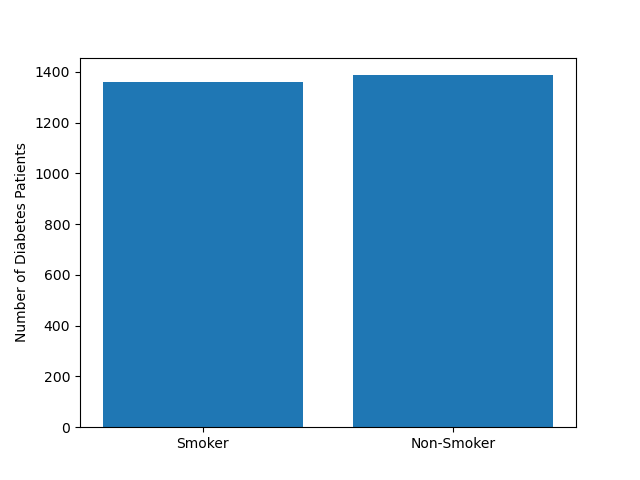

In [8]:
plt.figure()
plt.bar(type2_yesfam_sm_df['Smoking Status'], type2_yesfam_sm_df['count'])
plt.ylabel('Number of Diabetes Patients')
plt.show()

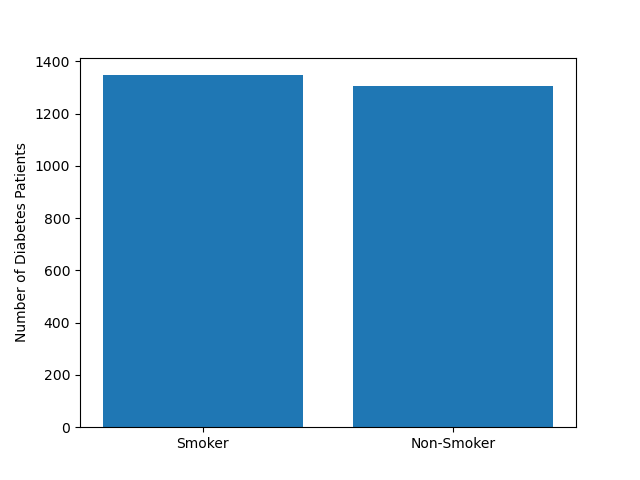

In [9]:
plt.figure()
plt.bar(type2_nofam_sm_df['Smoking Status'], type2_nofam_sm_df['count'])
plt.ylabel('Number of Diabetes Patients')
plt.show()

Type 2 Family History vs. Alcohol Consumption

In [10]:
#drinking_order = ['Low', 'Moderate', 'High']
family_drinking_type2_df = type2_df[['Family History', 'Alcohol Consumption']]
#family_drinking_type2_df
family_drinking_type2_df.reset_index(drop=True)
type2_fd = pd.DataFrame(family_drinking_type2_df.value_counts())
type2_fd = type2_fd.sort_values(by=['Alcohol Consumption']).reset_index()
type2_fd_df = pd.DataFrame(type2_fd)
type2_yesfam_dr_df = type2_fd_df[type2_fd_df['Family History'] == 'Yes']
#type2_yesfam_dr_df.set_index('Alcohol Consumption').loc[drinking_order].reset_index()
type2_nofam_dr_df = type2_fd_df[type2_fd_df['Family History'] == 'No']
print(type2_yesfam_dr_df)
print(type2_nofam_dr_df)



  Family History Alcohol Consumption  count
0            Yes                High    915
3            Yes                 Low    922
4            Yes            Moderate    909
  Family History Alcohol Consumption  count
1             No                High    835
2             No                 Low    939
5             No            Moderate    877


Type 1 Diabetes

In [11]:
type1_df = original_data[original_data['Target'] == 'Type 1 Diabetes']
type1_df.reset_index()
print(len(type1_df))
print(type1_df.value_counts('Family History'))
print(type1_df.value_counts('Smoking Status'))
print(type1_df.value_counts('Alcohol Consumption'))

5446
Family History
Yes    2729
No     2717
Name: count, dtype: int64
Smoking Status
Non-Smoker    2725
Smoker        2721
Name: count, dtype: int64
Alcohol Consumption
Low         1858
Moderate    1795
High        1793
Name: count, dtype: int64


Type 1 Family History vs. Smoking

In [12]:
family_smoking_type1_df = type1_df[['Family History', 'Smoking Status']]
family_smoking_type1_df.reset_index(drop=True)
type1_fs = pd.DataFrame(family_smoking_type1_df.value_counts())
type1_fs = type1_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
type1_fs_df = pd.DataFrame(type1_fs)
type1_yesfam_sm_df = type1_fs_df[type1_fs_df['Family History'] == 'Yes']

type1_nofam_sm_df = type1_fs_df[type1_fs_df['Family History'] == 'No']
print(type1_yesfam_sm_df)
print(type1_nofam_sm_df)

  Family History Smoking Status  count
0            Yes         Smoker   1377
3            Yes     Non-Smoker   1352
  Family History Smoking Status  count
1             No         Smoker   1344
2             No     Non-Smoker   1373


Type 1 Family History vs. Alcohol Consumption

In [13]:
#drinking_order = ['Low', 'Moderate', 'High']
family_drinking_type1_df = type1_df[['Family History', 'Alcohol Consumption']]
#family_drinking_type1_df
family_drinking_type1_df.reset_index(drop=True)
type1_fd = pd.DataFrame(family_drinking_type1_df.value_counts())
type1_fd = type1_fd.sort_values(by=['Alcohol Consumption']).reset_index()
type1_fd_df = pd.DataFrame(type1_fd)
type1_yesfam_dr_df = type1_fd_df[type1_fd_df['Family History'] == 'Yes']
#type1_yesfam_dr_df.set_index('Alcohol Consumption').loc[drinking_order].reset_index()
type1_nofam_dr_df = type1_fd_df[type1_fd_df['Family History'] == 'No']
print(type1_yesfam_dr_df)
print(type1_nofam_dr_df)

  Family History Alcohol Consumption  count
0            Yes                High    905
2            Yes                 Low    941
5            Yes            Moderate    883
  Family History Alcohol Consumption  count
1             No                High    888
3             No                 Low    917
4             No            Moderate    912


Type 3c (Pancreatogenic Diabetes)

In [14]:
type3c_df = original_data[original_data['Target'] == 'Type 3c Diabetes (Pancreatogenic Diabetes)']
type3c_df.reset_index()
print(len(type3c_df))
print(type3c_df.value_counts('Family History'))
print(type3c_df.value_counts('Smoking Status'))
print(type3c_df.value_counts('Alcohol Consumption'))

5320
Family History
No     2662
Yes    2658
Name: count, dtype: int64
Smoking Status
Smoker        2704
Non-Smoker    2616
Name: count, dtype: int64
Alcohol Consumption
Low         1826
Moderate    1765
High        1729
Name: count, dtype: int64


Type 3c (Pancreatogenic Diabetes) Family History vs. Smoking

In [15]:
family_smoking_type3c_df = type3c_df[['Family History', 'Smoking Status']]
family_smoking_type3c_df.reset_index(drop=True)
type3c_fs = pd.DataFrame(family_smoking_type3c_df.value_counts())
type3c_fs = type3c_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
type3c_fs_df = pd.DataFrame(type3c_fs)
type3c_yesfam_sm_df = type3c_fs_df[type3c_fs_df['Family History'] == 'Yes']
#type3c_yesfam_sm_df = type3c_yesfam_sm_df.iloc[::-1]
type3c_nofam_sm_df = type3c_fs_df[type3c_fs_df['Family History'] == 'No']
print(type3c_yesfam_sm_df)
print(type3c_nofam_sm_df)

  Family History Smoking Status  count
1            Yes         Smoker   1348
2            Yes     Non-Smoker   1310
  Family History Smoking Status  count
0             No         Smoker   1356
3             No     Non-Smoker   1306


Type 3c (Pancreatogenic Diabetes) Family History vs. Alcohol Consumption

In [16]:
#drinking_order = ['Low', 'Moderate', 'High']
family_drinking_type3c_df = type3c_df[['Family History', 'Alcohol Consumption']]
#family_drinking_type3c_df
family_drinking_type3c_df.reset_index(drop=True)
type3c_fd = pd.DataFrame(family_drinking_type3c_df.value_counts())
type3c_fd = type3c_fd.sort_values(by=['Alcohol Consumption']).reset_index()
type3c_fd_df = pd.DataFrame(type3c_fd)
type3c_yesfam_dr_df = type3c_fd_df[type3c_fd_df['Family History'] == 'Yes']
#type2_yesfam_dr_df.set_index('Alcohol Consumption').loc[drinking_order].reset_index()
type3c_nofam_dr_df = type3c_fd_df[type3c_fd_df['Family History'] == 'No']
print(type3c_yesfam_dr_df)
print(type3c_nofam_dr_df)

  Family History Alcohol Consumption  count
0            Yes                High    869
3            Yes                 Low    906
4            Yes            Moderate    883
  Family History Alcohol Consumption  count
1             No                High    860
2             No                 Low    920
5             No            Moderate    882


Wolfram Syndrome

In [17]:
wolfram_df = original_data[original_data['Target'] == 'Wolfram Syndrome']
wolfram_df.reset_index()
print(len(wolfram_df))
print(wolfram_df.value_counts('Family History'))
print(wolfram_df.value_counts('Smoking Status'))
print(wolfram_df.value_counts('Alcohol Consumption'))

5315
Family History
Yes    2703
No     2612
Name: count, dtype: int64
Smoking Status
Smoker        2659
Non-Smoker    2656
Name: count, dtype: int64
Alcohol Consumption
High        1813
Moderate    1778
Low         1724
Name: count, dtype: int64


Wolfram Family History vs. Smoking Status

In [18]:
family_smoking_wolfram_df = wolfram_df[['Family History', 'Smoking Status']]
family_smoking_wolfram_df.reset_index(drop=True)
wolfram_fs = pd.DataFrame(family_smoking_wolfram_df.value_counts())
wolfram_fs = wolfram_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
wolfram_fs_df = pd.DataFrame(wolfram_fs)
wolfram_yesfam_sm_df = wolfram_fs_df[wolfram_fs_df['Family History'] == 'Yes']

wolfram_nofam_sm_df = wolfram_fs_df[wolfram_fs_df['Family History'] == 'No']

print(wolfram_yesfam_sm_df)
print(wolfram_nofam_sm_df)

  Family History Smoking Status  count
0            Yes         Smoker   1364
2            Yes     Non-Smoker   1339
  Family History Smoking Status  count
1             No         Smoker   1295
3             No     Non-Smoker   1317


Wolfram Syndrome Family History vs. Alcohol Consumption

In [19]:
#drinking_order = ['Low', 'Moderate', 'High']
family_drinking_wolfram_df = wolfram_df[['Family History', 'Alcohol Consumption']]
#family_drinking_wolfram_df
family_drinking_wolfram_df.reset_index(drop=True)
wolfram_fd = pd.DataFrame(family_drinking_wolfram_df.value_counts())
wolfram_fd = wolfram_fd.sort_values(by=['Alcohol Consumption']).reset_index()
wolfram_fd_df = pd.DataFrame(wolfram_fd)
wolfram_yesfam_dr_df = wolfram_fd_df[wolfram_fd_df['Family History'] == 'Yes']
#wolfram_yesfam_dr_df.set_index('Alcohol Consumption').loc[drinking_order].reset_index()
wolfram_nofam_dr_df = wolfram_fd_df[wolfram_fd_df['Family History'] == 'No']
print(wolfram_yesfam_dr_df)
print(wolfram_nofam_dr_df)

  Family History Alcohol Consumption  count
0            Yes                High    929
2            Yes                 Low    865
4            Yes            Moderate    909
  Family History Alcohol Consumption  count
1             No                High    884
3             No                 Low    859
5             No            Moderate    869


Gestational Diabetes

In [20]:
gestational_df = original_data[original_data['Target'] == 'Gestational Diabetes']
gestational_df.reset_index()
print(len(gestational_df))
print(gestational_df.value_counts('Family History'))
print(gestational_df.value_counts('Smoking Status'))
print(gestational_df.value_counts('Alcohol Consumption'))

5344
Family History
Yes    2673
No     2671
Name: count, dtype: int64
Smoking Status
Smoker        2694
Non-Smoker    2650
Name: count, dtype: int64
Alcohol Consumption
Low         1826
High        1782
Moderate    1736
Name: count, dtype: int64


Gestational Family History vs Smoking Status

In [21]:
family_smoking_gestational_df = gestational_df[['Family History', 'Smoking Status']]
family_smoking_gestational_df.reset_index(drop=True)
gestational_fs = pd.DataFrame(family_smoking_gestational_df.value_counts())
gestational_fs = gestational_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
gestational_fs_df = pd.DataFrame(gestational_fs)
gestational_yesfam_sm_df = gestational_fs_df[gestational_fs_df['Family History'] == 'Yes']

gestational_nofam_sm_df = gestational_fs_df[gestational_fs_df['Family History'] == 'No']
print(gestational_yesfam_sm_df)
print(gestational_nofam_sm_df)

  Family History Smoking Status  count
1            Yes         Smoker   1311
2            Yes     Non-Smoker   1362
  Family History Smoking Status  count
0             No         Smoker   1383
3             No     Non-Smoker   1288


Gestational Family History vs. Alcohol Consumption

In [22]:
#drinking_order = ['Low', 'Moderate', 'High']
family_drinking_gestational_df = gestational_df[['Family History', 'Alcohol Consumption']]
#family_drinking_gestational_df
family_drinking_gestational_df.reset_index(drop=True)
gestational_fd = pd.DataFrame(family_drinking_gestational_df.value_counts())
gestational_fd = gestational_fd.sort_values(by=['Alcohol Consumption']).reset_index()
gestational_fd_df = pd.DataFrame(gestational_fd)
gestational_yesfam_dr_df = gestational_fd_df[gestational_fd_df['Family History'] == 'Yes']
#type2_yesfam_dr_df.set_index('Alcohol Consumption').loc[drinking_order].reset_index()
gestational_nofam_dr_df = gestational_fd_df[gestational_fd_df['Family History'] == 'No']
print(gestational_yesfam_dr_df)
print(gestational_nofam_dr_df)

  Family History Alcohol Consumption  count
0            Yes                High    897
2            Yes                 Low    922
5            Yes            Moderate    854
  Family History Alcohol Consumption  count
1             No                High    885
3             No                 Low    904
4             No            Moderate    882
